<h1 style='text-align: center;'>Лабораторна робота 4</h1>

<p style='text-align: end;'><b>ФБ-21 Жиговець Олександр</b></p>

<br>

<p> 
<b>Мета роботи:</b> отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit).
</p>

<br>

<p>
<b>Основні поняття:</b> numpy масиви, кортежі, списки, фрейми,
профілювання.
</p>

<hr>
<h1 style='text-align: center;'>DATAFRAME</h1>

In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from time import time

In [107]:
def create_df():
    df = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False, na_values="?")
    df.dropna(inplace=True)

    df['datetime'] = pd.to_datetime(df['Date'].str.cat(df['Time'], sep = " "), format='%d/%m/%Y %H:%M:%S')
    df.drop(['Date', 'Time'], axis=1, inplace=True)

    return df

df = create_df()
df.head()
print(f"Кількість записів - {len(df)}")

Кількість записів - 2049280


<hr></hr> <br>
1. Вибрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [108]:

start = time()

data = df[df["Global_active_power"] > 5]

end = time()

print(f"Кількість вибраних домогосподарств: {len(data)}\nЧас виконання: {end-start} секунд")
data.head()

Кількість вибраних домогосподарств: 17547
Час виконання: 0.005745410919189453 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
11,5.412,0.470,232.78,23.2,0.0,1.0,17.0,2006-12-16 17:35:00
12,5.224,0.478,232.99,22.4,0.0,1.0,16.0,2006-12-16 17:36:00


<hr></hr> <br>
2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [109]:
start = time()

data = df[df["Voltage"] > 235]

end = time()

print(f"Кількість вибраних домогосподарств: {len(data)}\nЧас виконання: {end-start} секунд")
data.head()

Кількість вибраних домогосподарств: 1952491
Час виконання: 0.07605242729187012 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
5,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
6,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00
7,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00
14,4.054,0.422,235.24,17.6,0.0,1.0,17.0,2006-12-16 17:38:00


<hr></hr> <br>
3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [110]:
start = time()

data_19_20 = df.loc[(df['Global_intensity'] >= 19) & (df['Global_intensity'] <= 20)]
boiler_and_cond_less = data_19_20.loc[data_19_20["Sub_metering_2"] > data_19_20["Sub_metering_3"]]

end = time()

print(f"Кількість домогосподарств, де сила стуруму в межах 19-20А і пральна машина та холодильник споживають більше ніж бойлер і кондиціонер: {len(boiler_and_cond_less)}\nЧас виконання:{end-start} секунд") 
boiler_and_cond_less.head()

Кількість домогосподарств, де сила стуруму в межах 19-20А і пральна машина та холодильник споживають більше ніж бойлер і кондиціонер: 2509
Час виконання:0.007846832275390625 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
45,4.464,0.136,234.66,19.0,0.0,37.0,16.0,2006-12-16 18:09:00
460,4.582,0.258,238.08,19.6,0.0,13.0,0.0,2006-12-17 01:04:00
464,4.618,0.104,239.61,19.6,0.0,27.0,0.0,2006-12-17 01:08:00
475,4.636,0.140,237.37,19.4,0.0,36.0,0.0,2006-12-17 01:19:00
476,4.634,0.152,237.17,19.4,0.0,35.0,0.0,2006-12-17 01:20:00


<hr></hr> <br>
4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії.

In [111]:
random_house = df.sample(n=500000, replace=True)

start = time()
data = random_house["Sub_metering_1"].mean()
end = time()
print(f"Середнє споживання для першої групи: {data:.2f} Вт-годин\nЧас виконання: {end-start} секунд")

start = time()
data = random_house["Sub_metering_2"].mean()
end = time()
print(f"\nСереднє споживання для другої групи: {data:.2f} Вт-годин\nЧас виконання: {end-start} секунд")

start = time()
data = random_house["Sub_metering_3"].mean()
end = time()
print(f"\nСереднє споживання для третьої групи: {data:.2f} Вт-годин\nЧас виконання: {end-start} секунд")

Середнє споживання для першої групи: 1.12 Вт-годин
Час виконання: 0.0021898746490478516 секунд

Середнє споживання для другої групи: 1.31 Вт-годин
Час виконання: 0.001039743423461914 секунд

Середнє споживання для третьої групи: 6.47 Вт-годин
Час виконання: 0.0 секунд


<hr></hr> <br>
<p>5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити: ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою) обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [112]:
start = time()

df = df[df['datetime'].dt.hour >= 18]
df = df[df['Global_active_power'] > 6]

df = df[df['Sub_metering_2'] > df['Sub_metering_1']]
df = df[df['Sub_metering_2'] > df['Sub_metering_3']]

n = len(df)

f = df.iloc[:n//2]
s = df.iloc[n//2:]
selected_f = f.iloc[::3]
selected_s = s.iloc[::4]

data = pd.concat([selected_f, selected_s])

end = time()

print(f"Кількість вибраних домогосподарств: {len(data)}\nЧас виконання: {end-start} секунд")
data.head()

Кількість вибраних домогосподарств: 310
Час виконання: 0.08446574211120605 секунд


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
41,6.052,0.192,232.93,26.2,0.0,37.0,17.0,2006-12-16 18:05:00
44,6.308,0.116,232.25,27.0,0.0,36.0,17.0,2006-12-16 18:08:00
17494,6.386,0.374,236.63,27.0,1.0,36.0,17.0,2006-12-28 20:58:00
17498,8.088,0.262,235.50,34.4,1.0,72.0,17.0,2006-12-28 21:02:00
17501,7.230,0.152,235.22,30.6,1.0,73.0,17.0,2006-12-28 21:05:00


<hr>
<h1 style='text-align: center;'>Numpy ARRAY</h1>

In [113]:
df = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False, na_values="?")
df.dropna(inplace=True)

columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[columns] = df[columns].astype(float)
df = df.to_numpy()

print(f"Кількість записів - {df.shape[0]}")

Кількість записів - 2049280


<hr></hr> <br>
1. Вибрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [114]:
start = time()

df_ = df[df[:, 2] > 5]

end = time()
print(f"Кількість вибраних домогосподарств - {len(df_)}\nЧас виконання {end-start} секунд")

Кількість вибраних домогосподарств - 17547
Час виконання 0.0713651180267334 секунд


<hr></hr> <br>
2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [115]:
start = time()

df_ = df[df[:, 4] > 235]

end = time()
print(f"Кількість вибраних домогосподарств - {len(df_)}\nЧас виконання {end-start} секунд")

Кількість вибраних домогосподарств - 1952491
Час виконання 0.27883243560791016 секунд


<hr></hr> <br>
3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [116]:
start = time()

ampers = df[(df[:, 5] >= 19) & (df[:, 5] <= 20)]
houses = ampers[ampers[:, 7] > ampers[:, 8]]

end = time()
print(f"Кількість вибраних домогосподарств - {len(houses)}\nЧас виконання {end-start} секунд")

Кількість вибраних домогосподарств - 2509
Час виконання 0.13974380493164062 секунд


<hr></hr> <br>
4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії.

In [117]:

rand_i = np.random.choice(df.shape[0], size=500000, replace=True)
rand = df[rand_i]

start = time()
mean = np.mean(rand[:, 6])
end = time()
print(f"Середнє споживання групи 1: {mean:.2f} Вт-годин\nЧас виконання {end-start} секунд")

start = time()
mean = np.mean(rand[:, 7])
end = time()
print(f"\nСереднє споживання групи 2: {mean:.2f} Вт-годин\nЧас виконання {end-start} секунд")

start = time()
mean = np.mean(rand[:, 8])
end = time()
print(f"\nСереднє споживання групи 3: {mean:.2f} Вт-годин\nЧас виконання {end-start} секунд")



Середнє споживання групи 1: 1.12 Вт-годин
Час виконання 0.0345916748046875 секунд

Середнє споживання групи 2: 1.29 Вт-годин
Час виконання 0.04865312576293945 секунд

Середнє споживання групи 3: 6.47 Вт-годин
Час виконання 0.03211545944213867 секунд


<hr></hr> <br>
<p>5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити: ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою) обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [118]:
start = time()

df_ = df[(df[:, 1] >= "18:00:00") & (df[:, 2] > 6)]
df_ = df_[df_[:, 7] > df_[:, 6]]
df_ = df_[df_[:, 7] > df_[:, 8]]

if df_.shape[0] > 0:
    f = df_[:len(df_)//2]
    s = df_[len(df_)//2:]

    selected_f = f[::3]
    selected_s = s[::4]

    data = np.concatenate((selected_f, selected_s))

end = time()

print(f"Кількість обраних домогосподарств: {len(data)}\nЧас виконання {end-start} секунд")

Кількість обраних домогосподарств: 310
Час виконання 0.2377471923828125 секунд


<hr>
<h1 style='text-align: center;'>Частина 2</h1>

In [119]:
df = pd.read_csv("second_data/imports-85.data", sep=",", header=None, na_values='?')
df.columns = ["symboling", "normalized-loses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

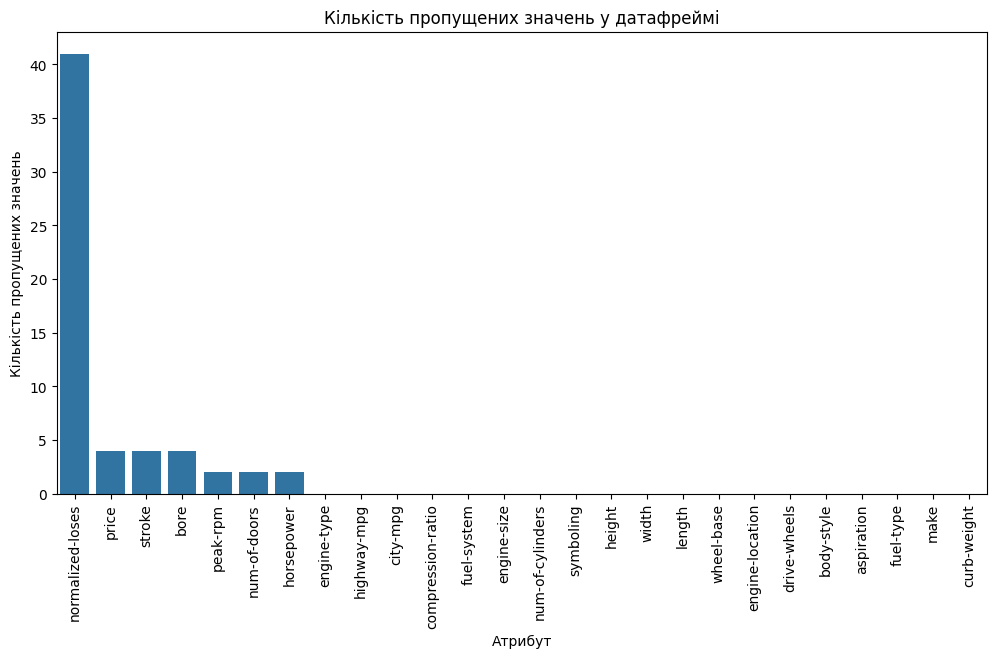

In [124]:
missing = df.isnull().sum()
sorted = missing.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted.index, y=sorted.values)
plt.xticks(rotation=90)
plt.title("Кількість пропущених значень у датафреймі")
plt.xlabel("Атрибут")
plt.ylabel("Кількість пропущених значень")
plt.show()


<hr></hr> <br>
<p>1. Поборотися із зниклими даними.

In [126]:

df = df.dropna()
#df = df.fillna()

missing = df.isnull().sum()
sorted = missing.sort_values(ascending=False)

In [127]:
sorted

symboling            0
normalized-loses     0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
price                0
dtype: int64

In [128]:
df

,symboling,normalized-loses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<hr></hr> <br>
<p>2. Пронормувати вибраний датасет або стандартизувати його. <p>

In [136]:


def normalize(data):
    return (data - data.min())/(data.max() - data.min())

def standart(data):
    return (data - data.mean())/data.std()

df[f"horsepower_norm"] = normalize(df["horsepower"])
df[f"horsepower_stand"] = standart(df["horsepower"])


C:\Users\oleks\AppData\Local\Temp\ipykernel_8460\1271976633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"horsepower_norm"] = normalize(df["horsepower"])
C:\Users\oleks\AppData\Local\Temp\ipykernel_8460\1271976633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"horsepower_stand"] = standart(df["horsepower"])


Text(0.5, 1.0, 'Стандартизовані')

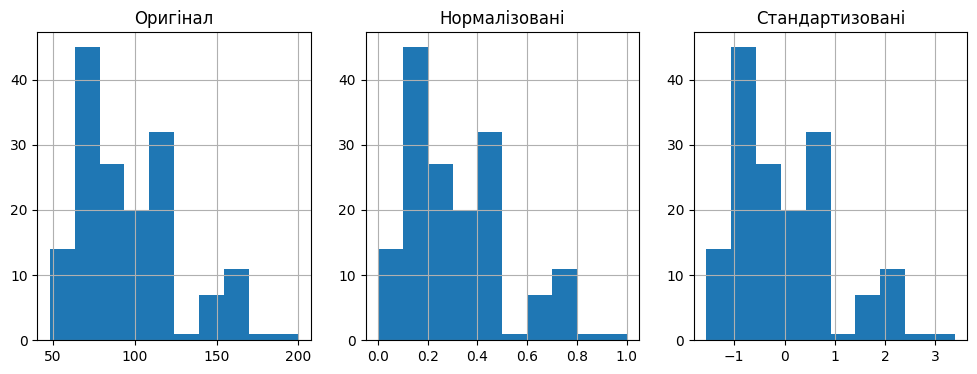

In [138]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
df['horsepower'].hist()
plt.title("Оригінал")

plt.subplot(1,3,2)
df["horsepower_norm"].hist()
plt.title("Нормалізовані")

plt.subplot(1,3,3)
df["horsepower_stand"].hist()
plt.title("Стандартизовані")


<hr></hr> <br>
<p>3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.<p>

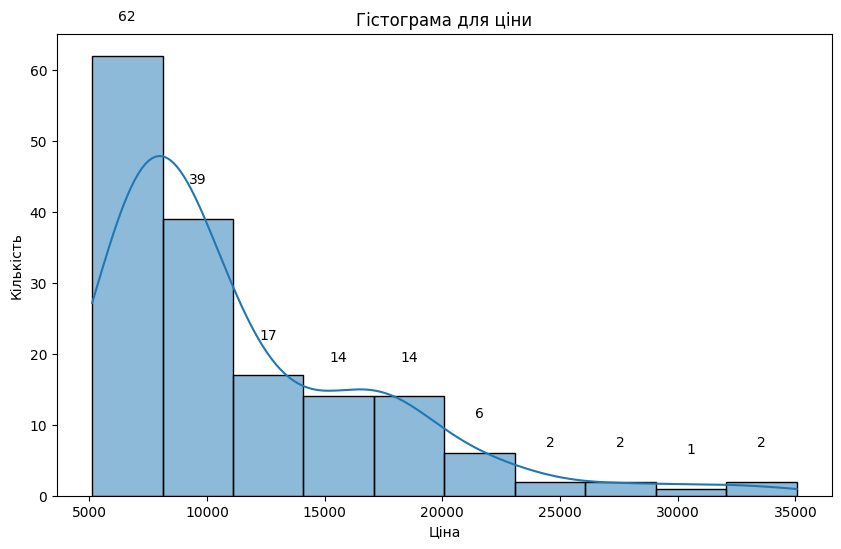

Кількість в кожному діапазоні:
(5088.061, 8111.8]    62
(8111.8, 11105.6]     39
(11105.6, 14099.4]    17
(14099.4, 17093.2]    14
(17093.2, 20087.0]    14
(20087.0, 23080.8]     6
(23080.8, 26074.6]     2
(26074.6, 29068.4]     2
(29068.4, 32062.2]     1
(32062.2, 35056.0]     2
Name: count, dtype: int64

Максимальна кількість в одному діапазоні: 62

Елементів (загальні к-кість): 159


In [143]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x = "price", bins=10, kde=True)
plt.title('Гістограма для ціни')
plt.xlabel('Ціна')
plt.ylabel('Кількість')

values = df['price'].value_counts(bins=10, sort=False)

for i, count in enumerate(values):
    plt.text(values.index[i].mid, count + 5, str(count), ha='center')
plt.show()

print(f"Кількість в кожному діапазоні:\n{values}\n\nМаксимальна кількість в одному діапазоні: {values.max()}\n\nЕлементів (загальні к-кість): {df['price'].count()}")


<hr></hr> <br>
<p>4. Збудувати графік залежності одного integer/real атрибута від іншого.<p>

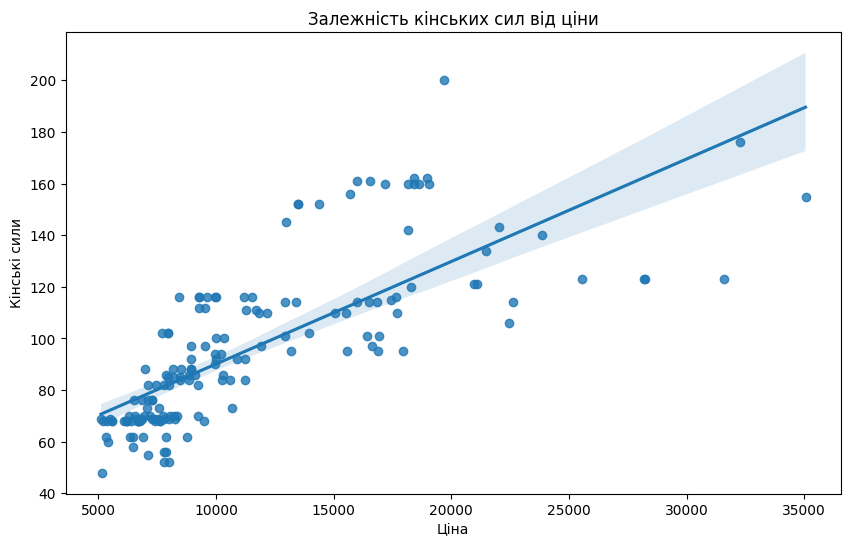

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="price", y="horsepower", data=df)

ax.set_title('Залежність кінських сил від ціни')
ax.set_xlabel('Ціна')
ax.set_ylabel('Кінські сили')

plt.show()

<hr></hr> <br>
<p>5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.<p>

In [151]:
import scipy.stats

pc, pv = scipy.stats.pearsonr(df['price'], df['horsepower'])
sc, pv = scipy.stats.spearmanr(df['price'], df['horsepower'])

print(f"Коефіцієнт Пірсона - {pc}\nКоефіцієнт Спірмена - {sc}")

df

Коефіцієнт Пірсона - 0.7598739453800996
Коефіцієнт Спірмена - 0.8610392048532152


,symboling,normalized-loses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_norm,horsepower_stand
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.355263,0.200645
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.440789,0.623841
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,0.407895,0.461073
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,0.605263,1.437681
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,0.348684,0.168091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0.434211,0.591288
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0.736842,2.088753
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0.565789,1.242359
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0.381579,0.330859


<hr></hr> <br>
<p>6. Провести One Hot Encoding категоріального string атрибуту.<p>

In [166]:
from sklearn.preprocessing import OneHotEncoder

dfc = df.copy()
enc = OneHotEncoder()

make_enc = enc.fit_transform(dfc[['make']]).toarray()

make_cols = enc.categories_[0]
for i, col in enumerate(make_cols):
    dfc[col] = make_enc[:, i]


dfc
#print(dfc[['make'] + list(make_cols)])

,symboling,normalized-loses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<hr></hr> <br>
<p>7. Провести візуалізацію багатовимірних даних.<p>

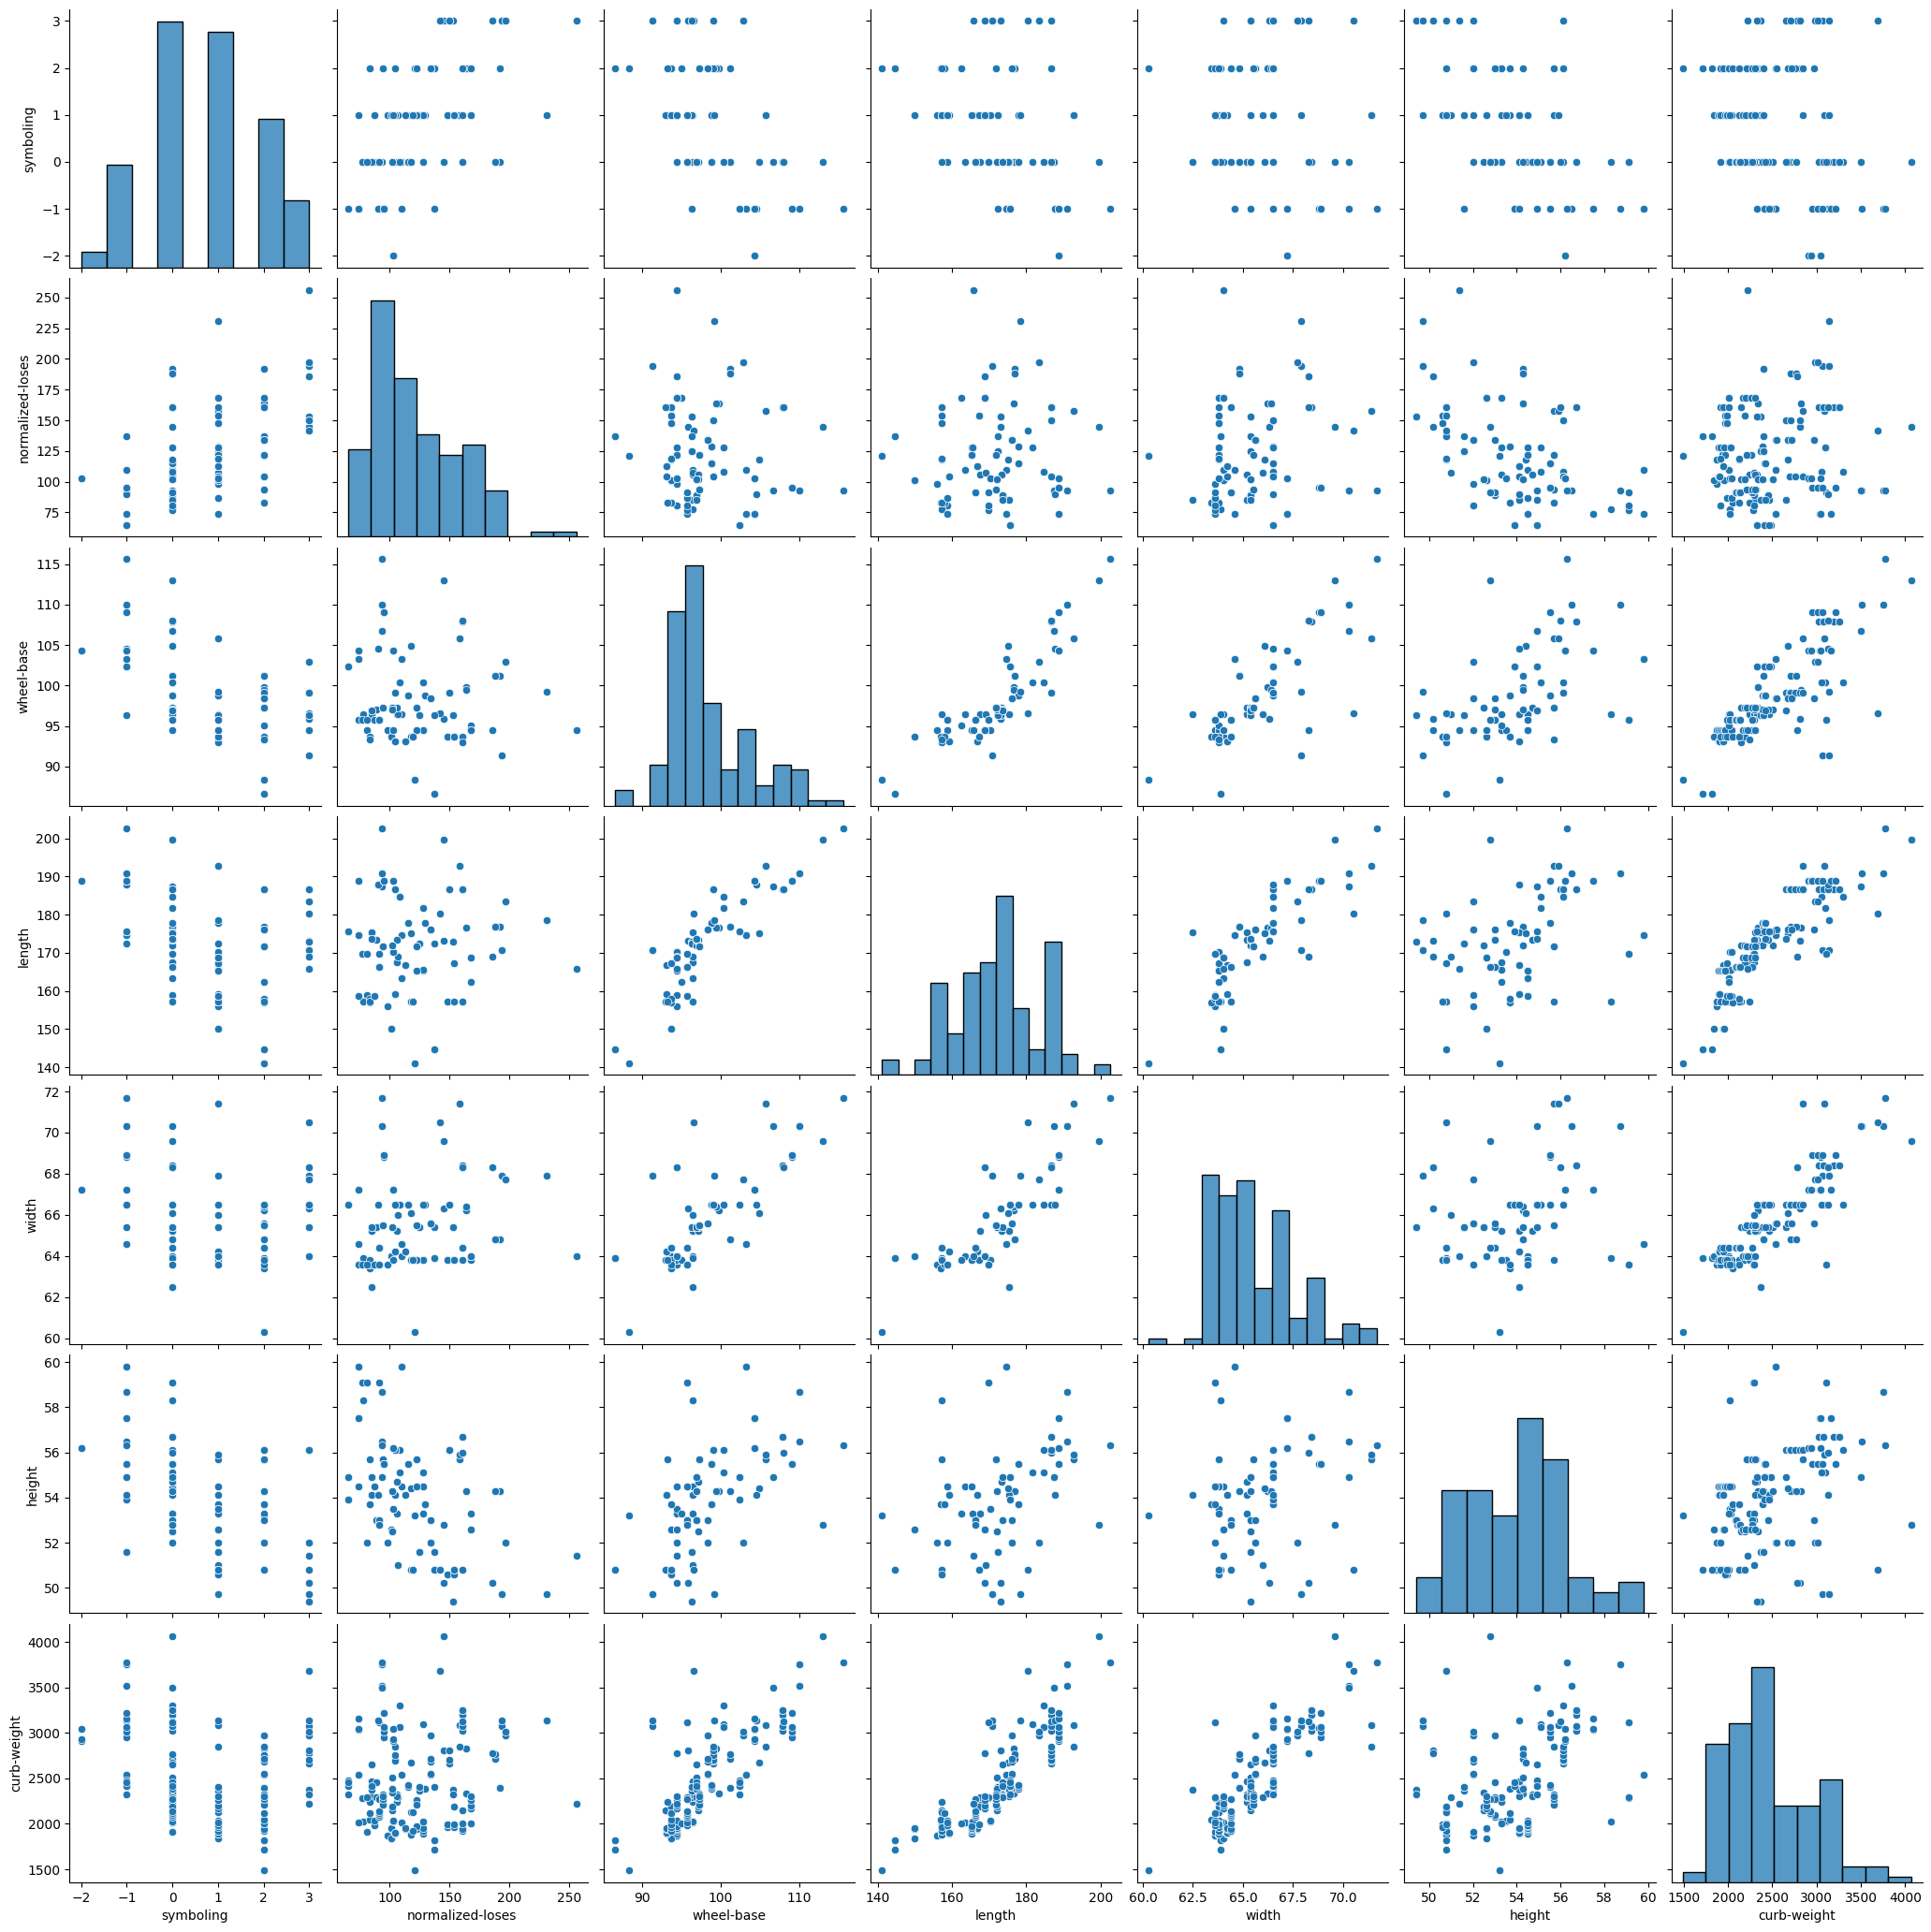

In [186]:
sns.pairplot(df[df.columns[:15]], height=3, aspect=1)
plt.show()